In [ ]:
from dgraph_flex import DgraphFlex

obj = DgraphFlex()
# add edges to graph object
obj.add_edge('A', '-->', 'B', color='green', strength=-0.5, pvalue=0.01)
obj.add_edge('B', '-->', 'C', color='red', strength=-.5, pvalue=0.001)
obj.add_edge('C', '-->', 'E', color='green', strength=0.5, pvalue=0.005)
obj.add_edge('D', 'o-o', 'B')
# load into graphviz object and render to window
obj.show_graph()


Run an analysis


In [ ]:
# read data

from pytetrad_plus import MyTetradSearch
import pprint

ts = MyTetradSearch()

DIR='pytetrad_plus'
# read data
df_raw = ts.read_csv(f'{DIR}/boston_data_raw.csv')
df = ts.read_csv(f'{DIR}/boston_data.csv')

df_raw

In [ ]:
# add the lag columns
df_lag = ts.add_lag_columns(df, lag_stub='_lag')
# standardize the data
df_lag_std = ts.standardize_df_cols(df_lag)

print(f"DataFrame loaded and lag columns added, columns standardized. Number of rows: {len(df_lag)}")
df_lag

In [ ]:

# load prior
prior_lines = ts.read_prior_file(f'{DIR}/boston_prior.txt')
# extract knowledge
knowledge = ts.extract_knowledge(prior_lines)
pprint.pprint(knowledge)

ts.load_knowledge(knowledge)

searchResult = ts.run_model_search(df, model='gfci',
                                                    knowledge=knowledge,
                                                    score={'sem_bic': {'penalty_discount': 1.0}},
                                                    test={'fisher_z': {'alpha': .05}})

edges = list(searchResult['setEdges'])
pprint.pprint(edges)

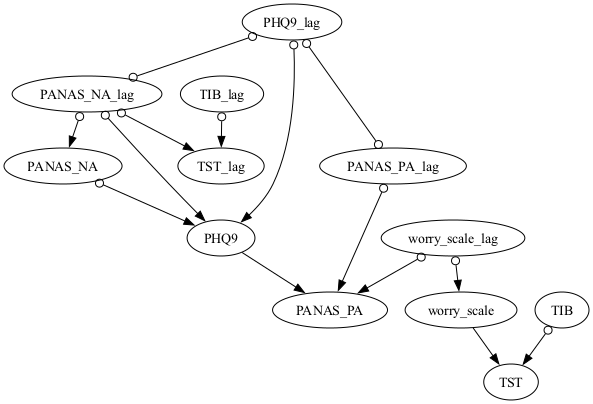

In [8]:
from dgraph_flex import DgraphFlex
# create graph output
obj = DgraphFlex()

# add the edges
obj.add_edges(edges)
# show the graph
obj.show_graph()

In [9]:
# run the sem
import semopy

lavaan_model = ts.edges_to_lavaan(edges)
    
# run semopy
sem_results = ts.run_semopy(lavaan_model, df)

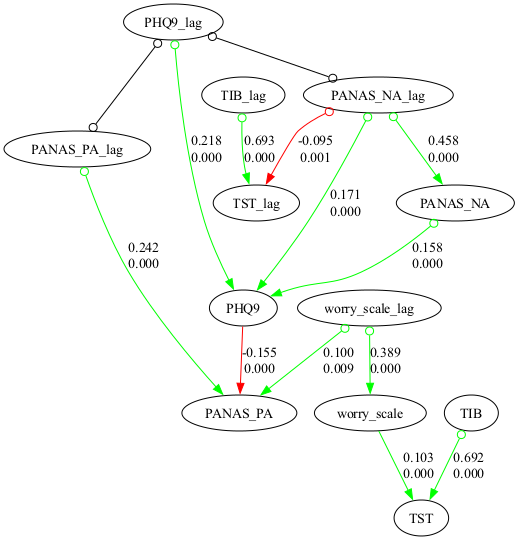

In [10]:
# add sem results to existing graph

ts.add_sem_results_to_graph(obj, sem_results['estimates'])
obj.show_graph()